In [1]:
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loyalty_members = pandas.read_csv("../dataset/loyalty_members_2000.csv")
loyalty_points_activity = pandas.read_csv("../dataset/loyalty_points_activity_2000.csv")
online_customers = pandas.read_csv("../dataset/online_customers_2000.csv")
online_orders = pandas.read_csv("../dataset/online_orders_2000.csv")
pos_products = pandas.read_csv("../dataset/pos_products_1000.csv")
pos_transactions = pandas.read_csv("../dataset/pos_transactions_header_1000_v2.csv")
pos_transactions_line = pandas.read_csv("../dataset/pos_transactions_line_2000.csv")

In [3]:
print(loyalty_members.info())
print(loyalty_members.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   loyalty_member_id  2000 non-null   int64 
 1   enrolment_date     2000 non-null   object
 2   first_name         2000 non-null   object
 3   last_name          2000 non-null   object
 4   email              2000 non-null   object
 5   date_of_birth      2000 non-null   object
 6   gender             2000 non-null   object
 7   primary_store_id   2000 non-null   int64 
 8   consent_marketing  2000 non-null   bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 127.1+ KB
None
loyalty_member_id    0
enrolment_date       0
first_name           0
last_name            0
email                0
date_of_birth        0
gender               0
primary_store_id     0
consent_marketing    0
dtype: int64


In [4]:
print(loyalty_points_activity.info())
print(loyalty_points_activity.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   points_txn_id      2000 non-null   int64 
 1   loyalty_member_id  2000 non-null   int64 
 2   source_system      2000 non-null   object
 3   source_reference   2000 non-null   int64 
 4   activity_type      2000 non-null   object
 5   points             2000 non-null   int64 
 6   activity_datetime  2000 non-null   object
dtypes: int64(4), object(3)
memory usage: 109.5+ KB
None
points_txn_id        0
loyalty_member_id    0
source_system        0
source_reference     0
activity_type        0
points               0
activity_datetime    0
dtype: int64


In [5]:
print(online_customers.info())
print(online_customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_customer_id  2000 non-null   int64  
 1   first_name          2000 non-null   object 
 2   last_name           2000 non-null   object 
 3   email               2000 non-null   object 
 4   phone               2000 non-null   object 
 5   city                2000 non-null   object 
 6   loyalty_member_id   1230 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB
None
online_customer_id      0
first_name              0
last_name               0
email                   0
phone                   0
city                    0
loyalty_member_id     770
dtype: int64


In [6]:
print(online_customers.info())
print(online_customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   online_customer_id  2000 non-null   int64  
 1   first_name          2000 non-null   object 
 2   last_name           2000 non-null   object 
 3   email               2000 non-null   object 
 4   phone               2000 non-null   object 
 5   city                2000 non-null   object 
 6   loyalty_member_id   1230 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.5+ KB
None
online_customer_id      0
first_name              0
last_name               0
email                   0
phone                   0
city                    0
loyalty_member_id     770
dtype: int64


In [7]:
print(pos_transactions_line.info())
print(pos_transactions_line.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pos_receipt_id  2000 non-null   int64  
 1   line_number     2000 non-null   int64  
 2   product_id      2000 non-null   int64  
 3   quantity        2000 non-null   int64  
 4   unit_price      2000 non-null   float64
 5   line_discount   2000 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 93.9 KB
None
pos_receipt_id    0
line_number       0
product_id        0
quantity          0
unit_price        0
line_discount     0
dtype: int64


In [8]:

print(pos_transactions.info())
print(pos_transactions.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   store_id           1000 non-null   int64  
 1   trans_datetime     1000 non-null   object 
 2   staff_id           1000 non-null   int64  
 3   payment_type       1000 non-null   object 
 4   order_channel      1000 non-null   object 
 5   loyalty_member_id  633 non-null    float64
 6   Unnamed: 6         0 non-null      float64
 7   pos_receipt_id     1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB
None
store_id                0
trans_datetime          0
staff_id                0
payment_type            0
order_channel           0
loyalty_member_id     367
Unnamed: 6           1000
pos_receipt_id          0
dtype: int64


In [9]:

print(pos_products.info())
print(pos_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      1000 non-null   int64  
 1   product_name    1000 non-null   object 
 2   category        1000 non-null   object 
 3   subcategory     1000 non-null   object 
 4   size            356 non-null    object 
 5   unit_cost       1000 non-null   float64
 6   list_price      1000 non-null   float64
 7   is_active       1000 non-null   bool   
 8   pos_receipt_id  1000 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 63.6+ KB
None
product_id          0
product_name        0
category            0
subcategory         0
size              644
unit_cost           0
list_price          0
is_active           0
pos_receipt_id      0
dtype: int64


In [10]:
# 1. Ensure the column is datetime (using dayfirst=True to avoid errors)
pos_transactions["trans_datetime"] = pandas.to_datetime(pos_transactions["trans_datetime"], dayfirst=True)
online_orders["order_datetime"] = pandas.to_datetime(online_orders["order_datetime"],dayfirst=True)
# 2. Extract the hour (0-23)
hours = pos_transactions["trans_datetime"].dt.hour
hours_online = online_orders["order_datetime"].dt.hour
month = pos_transactions["trans_datetime"].dt.month
month_online = online_orders["order_datetime"].dt.month

# 3. Define the bin edges and labels
# Bins: 0-6, 6-12, 12-18, 18-24
bins = [0, 6, 12, 18, 24]
labels = ['00:00-06:00', '06:00-12:00', '12:00-18:00', '18:00-24:00']
month_bins = [0,1,2,3,4,5,6,7,8,9,10,11,12]
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']

# 4. Create the range column
# right=False means the range is [start, end), so 06:00 falls into the second bin
pos_transactions["time_range"] = pandas.cut(hours, bins=bins, labels=labels, right=False)
online_orders["time_range"] = pandas.cut(hours_online,bins=bins,labels=labels,right=False)
pos_transactions['month'] = pandas.cut(month,bins=month_bins,labels=month_labels,right=True,ordered=False)


In [11]:
del pos_transactions["Unnamed: 6"]

In [12]:
# Merging Datasets
# POS_Transactions and Loyalty_Members on loyalty_member_id creates a dataset of loyal members with their transactions
# Online_orders and Online Customers on online_customer_id creates a dataset of online customers with their online orders
# Loyalty_members and Loyalty Points on loyalty_member_id creates a dataset that tracks the loyal members and their point activity

pos_merged_with_members = pos_transactions.merge(right=loyalty_members,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
online_merged = online_customers.merge(right=online_orders,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
loyalty_merged = loyalty_members.merge(right=loyalty_points_activity,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
pos_transactions_line_merged = pos_transactions.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)
line_products = pos_products.merge(right=pos_transactions_line,how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True,indicator=False, validate=None)

In [13]:
# Cleaning Data: Removing null values
pos_merged_with_members.dropna()
online_merged.dropna()
loyalty_merged.dropna()

,loyalty_member_id,enrolment_date,first_name,last_name,email,date_of_birth,gender,primary_store_id,consent_marketing,points_txn_id,source_system,source_reference,activity_type,points,activity_datetime
0,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70069,ONLINE,82647,Redeem,-26,25/04/2024 23:35
1,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70188,ONLINE,94176,Redeem,-48,16/04/2024 20:22
2,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,70328,ONLINE,83068,Adjust,2,13/02/2024 19:02
3,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71390,ONLINE,82034,Earn,21,24/02/2024 15:27
4,3001,02/04/2021,Daniel,Patel,daniel.patel@outlook.com,20/12/1981,F,3,True,71996,POS,84674,Earn,47,28/02/2024 13:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70670,ONLINE,92563,Redeem,-17,26/03/2024 20:49
1996,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,70791,ONLINE,90556,Adjust,-16,19/01/2024 10:32
1997,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71079,ONLINE,88591,Adjust,4,10/01/2024 20:29
1998,3200,14/07/2024,Maria,Green,maria.green@yahoo.com,18/01/2016,F,3,False,71136,ONLINE,86775,Adjust,14,25/01/2024 15:09


In [14]:
# Cleaning Data: Removing Duplicate Data
pos_merged_with_members.drop_duplicates()
online_merged.drop_duplicates()
loyalty_merged.drop_duplicates()
loyalty_members.drop_duplicates()
loyalty_points_activity.drop_duplicates()
online_customers.drop_duplicates()
online_orders.drop_duplicates()
pos_products.drop_duplicates()
pos_transactions .drop_duplicates()


,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan
1,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar
2,2,2024-01-15 12:47:00,5006,Mobile Wallet,In-Store,3003.0,90433,12:00-18:00,Jan
3,4,2024-01-01 03:38:00,5002,Voucher,In-Store,3001.0,90617,00:00-06:00,Jan
4,4,2024-01-29 17:07:00,5002,Card,In-Store,3003.0,90460,12:00-18:00,Jan
...,...,...,...,...,...,...,...,...,...
995,1,2024-02-25 00:20:00,5004,Voucher,Click-and-Collect,NaN,90632,00:00-06:00,Feb
996,1,2024-02-20 22:01:00,5002,Cash,In-Store,NaN,90368,18:00-24:00,Feb
997,1,2024-01-26 15:28:00,5007,Voucher,Click-and-Collect,3004.0,90189,12:00-18:00,Jan
998,5,2024-01-17 07:34:00,5009,Voucher,In-Store,NaN,90198,06:00-12:00,Jan


In [15]:
# Exporting Datasets
pos_merged_with_members.to_csv("../dataset/pos_merged_with_members.csv",index=False)
online_merged.to_csv("../dataset/online_merged.csv",index=False)
loyalty_merged.to_csv("../dataset/loyalty_merged.csv",index=False)
pos_transactions_line_merged.to_csv("../dataset/pos_transactions_line_products.csv",index=False)


In [16]:
pos_transactions_line_merged.head()

,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month,line_number,product_id,quantity,unit_price,line_discount
0,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,2,115,1,4.84,0.10
1,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,811,1,1.84,0.50
2,3,2024-01-05 18:23:00,5002,Voucher,Click-and-Collect,3002.0,90655,18:00-24:00,Jan,3,32,4,5.50,0.25
3,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,5,755,1,4.55,0.00
4,1,2024-03-17 07:44:00,5007,Mobile Wallet,Click-and-Collect,3001.0,90143,06:00-12:00,Mar,4,649,3,2.59,0.10


In [17]:
# How do in-store vs online sales compare by time, product and location?
pos_transactions_line_merged["amount_received"] = (pos_transactions_line_merged["unit_price"] * pos_transactions_line_merged["quantity"]) - pos_transactions_line_merged["line_discount"]        
amount_received = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum() 
most_purchased_product = pos_transactions_line.groupby("product_id").size()
pos_products_with_purchase_rate = pos_transactions_line_merged.copy()

pos_products_with_purchase_rate["number_of_purchases"] = pos_products_with_purchase_rate["product_id"].map(most_purchased_product)
pos_products_with_purchase_rate.sort_values(by="number_of_purchases",ascending=False).head(5).to_csv("../results/most_purchases_pos_product.csv",index=False)

In [18]:
# How do in-store vs online sales compare by time, product and location?                                    
most_purchased_product_online = online_orders.groupby("product_id").size()
pos_products_with_purchase_rate_online = online_orders.copy()

# Collect all completed orders only
orders = pos_products_with_purchase_rate_online["order_status"] == "Completed" 
jump = pos_products_with_purchase_rate_online[orders]
pos_products_with_purchase_rate_online = jump

pos_products_with_purchase_rate_online["number_of_purchases"] = pos_products_with_purchase_rate_online["product_id"].map(most_purchased_product)
pos_products_with_purchase_rate_online.sort_values(by="number_of_purchases",ascending=False).head(14).to_csv("../results/most_purchases_online_product.csv",index=False)

In [19]:
pos_products_with_purchase_rate.sort_values(by="number_of_purchases",ascending=False).head(5)

,store_id,trans_datetime,staff_id,payment_type,order_channel,loyalty_member_id,pos_receipt_id,time_range,month,line_number,product_id,quantity,unit_price,line_discount,amount_received,number_of_purchases
1083,5,2024-02-13 01:36:00,5002,Mobile Wallet,In-Store,3004.0,90957,00:00-06:00,Feb,4,957,3,2.80,0.50,7.90,7
1025,4,2024-01-07 18:14:00,5008,Mobile Wallet,In-Store,3003.0,90783,18:00-24:00,Jan,4,113,4,4.47,0.50,17.38,7
2179,1,2024-03-01 20:07:00,5009,Card,In-Store,3002.0,90944,18:00-24:00,Mar,2,113,1,5.60,0.25,5.35,7
2018,4,2024-03-28 20:57:00,5005,Cash,Click-and-Collect,3005.0,90972,18:00-24:00,Mar,2,113,4,4.05,0.10,16.10,7
912,4,2024-03-30 08:03:00,5008,Mobile Wallet,Click-and-Collect,3005.0,90798,06:00-12:00,Mar,4,113,3,2.53,0.10,7.49,7


In [20]:
pos_sales_time_range = pos_products_with_purchase_rate.groupby("time_range")["number_of_purchases"].sum()
online_sales_time_range = pos_products_with_purchase_rate_online.groupby("time_range")["number_of_purchases"].sum()

C:\Users\kumbi\AppData\Local\Temp\ipykernel_18704\3831762459.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_sales_time_range = pos_products_with_purchase_rate.groupby("time_range")["number_of_purchases"].sum()
C:\Users\kumbi\AppData\Local\Temp\ipykernel_18704\3831762459.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  online_sales_time_range = pos_products_with_purchase_rate_online.groupby("time_range")["number_of_purchases"].sum()


In [21]:
print("POS Sales by Time Range")
for time_range, total in pos_sales_time_range.items():
    print(f"  • {time_range}: {total} purchases")

print("\nOnline Sales by Time Range")
for time_range, total in online_sales_time_range.items():
    print(f"  • {time_range}: {total} purchases")


POS Sales by Time Range
  • 00:00-06:00: 2537 purchases
  • 06:00-12:00: 2256 purchases
  • 12:00-18:00: 2204 purchases
  • 18:00-24:00: 1988 purchases

Online Sales by Time Range
  • 00:00-06:00: 338 purchases
  • 06:00-12:00: 408 purchases
  • 12:00-18:00: 374 purchases
  • 18:00-24:00: 469 purchases


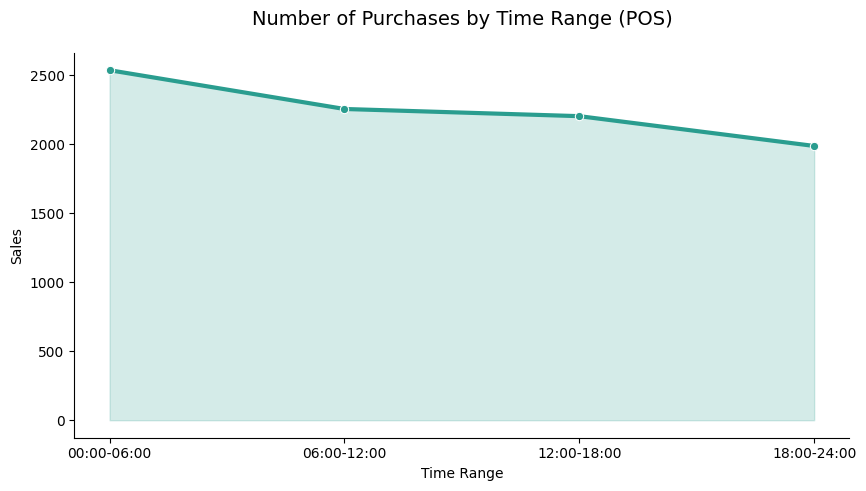

In [22]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=pos_sales_time_range.index, y=pos_sales_time_range.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(pos_sales_time_range.index, pos_sales_time_range.values, color='#2a9d8f', alpha=0.2)

plt.title("Number of Purchases by Time Range (POS)", fontsize=14, pad=20)
plt.ylabel("Sales")
plt.xlabel("Time Range")
sns.despine()
plt.show()

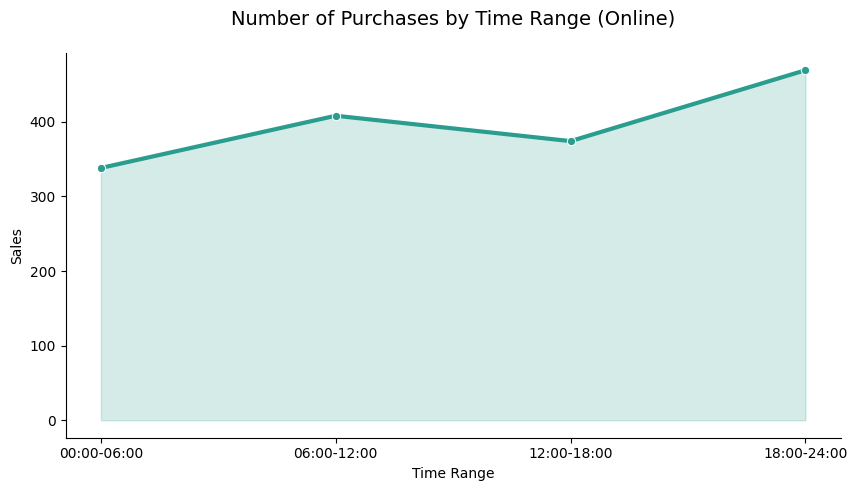

In [23]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=online_sales_time_range.index, y=online_sales_time_range.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(online_sales_time_range.index, online_sales_time_range.values, color='#2a9d8f', alpha=0.2)

plt.title("Number of Purchases by Time Range (Online)", fontsize=14, pad=20)
plt.ylabel("Sales")
plt.xlabel("Time Range")
sns.despine()
plt.show()

In [24]:
pos_products_with_purchase_rate.groupby("product_id")["number_of_purchases"].sum().sort_values( ascending=False).head(10)

product_id
113    91
433    90
394    84
485    78
460    72
703    66
957    63
424    60
384    60
193    60
Name: number_of_purchases, dtype: int64

In [25]:
pos_purchases_by_product = pos_products_with_purchase_rate.groupby("product_id")["number_of_purchases"].sum().sort_values( ascending=False).head(10)
online_purchases_by_product = pos_products_with_purchase_rate_online.groupby("product_id")["number_of_purchases"].sum().sort_values(ascending=False).head(10)


In [26]:
print("Top 10 POS Products by Number of Purchases")
for i, (product_id, total) in enumerate(pos_purchases_by_product.items(), start=1):
    print(f"{i}. Product ID {product_id}: {total} purchases")

print("\nTop 10 Online Products by Number of Purchases")
for i, (product_id, total) in enumerate(online_purchases_by_product.items(), start=1):
    print(f"{i}. Product ID {product_id}: {total} purchases")


Top 10 POS Products by Number of Purchases
1. Product ID 113: 91 purchases
2. Product ID 433: 90 purchases
3. Product ID 394: 84 purchases
4. Product ID 485: 78 purchases
5. Product ID 460: 72 purchases
6. Product ID 703: 66 purchases
7. Product ID 957: 63 purchases
8. Product ID 424: 60 purchases
9. Product ID 384: 60 purchases
10. Product ID 193: 60 purchases

Top 10 Online Products by Number of Purchases
1. Product ID 380: 35 purchases
2. Product ID 957: 28 purchases
3. Product ID 100: 24 purchases
4. Product ID 144: 24 purchases
5. Product ID 987: 20 purchases
6. Product ID 554: 20 purchases
7. Product ID 280: 18 purchases
8. Product ID 633: 18 purchases
9. Product ID 703: 18 purchases
10. Product ID 10: 16 purchases


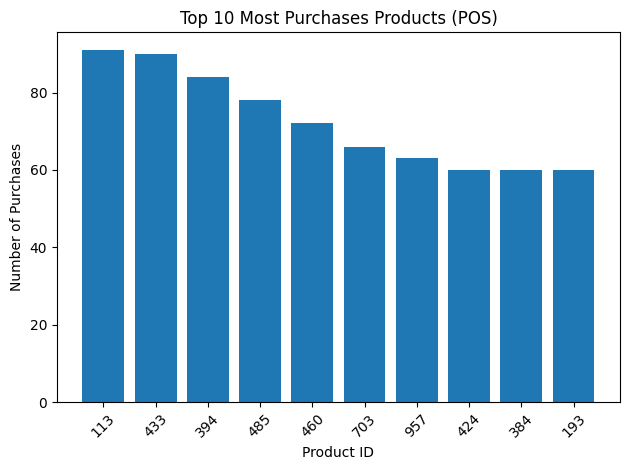

In [27]:
plt.figure()
plt.bar(pos_purchases_by_product.index.astype(str), pos_purchases_by_product.values)
plt.title("Top 10 Most Purchases Products (POS)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


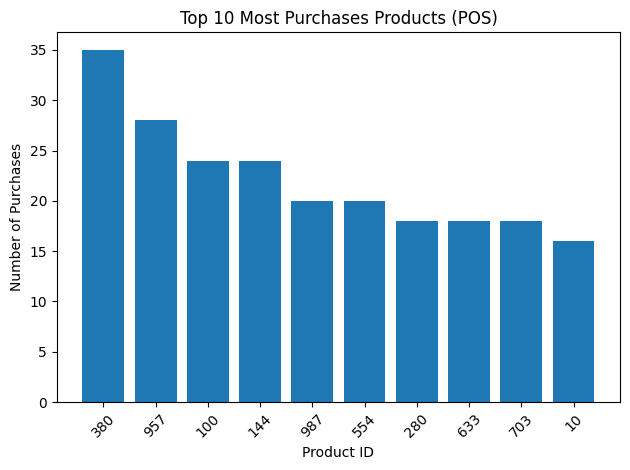

In [28]:
plt.figure()
plt.bar(online_purchases_by_product.index.astype(str), online_purchases_by_product.values)
plt.title("Top 10 Most Purchases Products (POS)")
plt.xlabel("Product ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
pos_purchases_by_location = pos_products_with_purchase_rate.groupby("store_id")["number_of_purchases"].sum().sort_values( ascending=False).head(10)
online_purchases_by_location = pos_products_with_purchase_rate_online.groupby("store_id")["number_of_purchases"].sum().sort_values(ascending=False).head(10)


In [30]:
print("Number of Purchases by Store (POS)")
for i, (store_id, total) in enumerate(pos_purchases_by_location.items(), start=1):
    print(f"{i}. Store ID {store_id}: {total} purchases")

print("\nNumber of Purchases by Store (Online)")
for i, (store_id, total) in enumerate(online_purchases_by_location.items(), start=1):
    print(f"{i}. Store ID {store_id}: {total} purchases")


Number of Purchases by Store (POS)
1. Store ID 1: 1935 purchases
2. Store ID 4: 1882 purchases
3. Store ID 2: 1861 purchases
4. Store ID 3: 1676 purchases
5. Store ID 5: 1631 purchases

Number of Purchases by Store (Online)
1. Store ID 2.0: 217 purchases
2. Store ID 1.0: 205 purchases
3. Store ID 3.0: 185 purchases


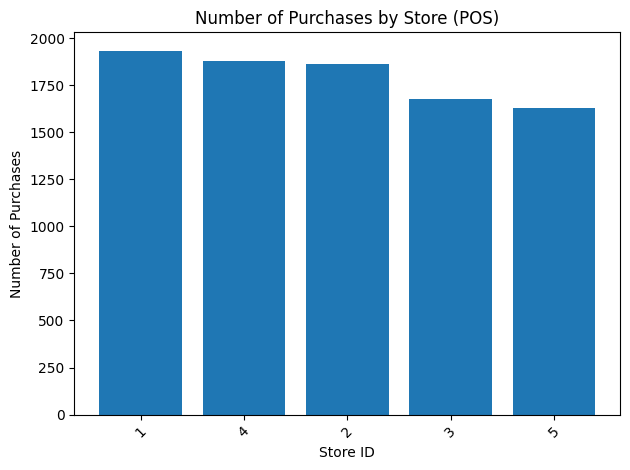

In [31]:
plt.figure()
plt.bar(pos_purchases_by_location.index.astype(str), pos_purchases_by_location.values)
plt.title("Number of Purchases by Store (POS)")
plt.xlabel("Store ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


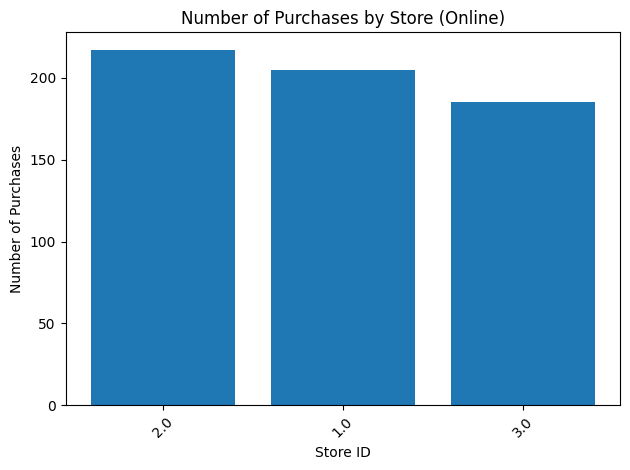

In [32]:
plt.figure()
plt.bar(online_purchases_by_location.index.astype(str), online_purchases_by_location.values)
plt.title("Number of Purchases by Store (Online)")
plt.xlabel("Store ID")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
pos_sales_channel = pos_transactions_line_merged.groupby("order_channel")["amount_received"].sum()
pos_sales_store = pos_transactions_line_merged.groupby("store_id")["amount_received"].sum()
pos_sales_product = pos_transactions_line_merged.groupby("product_id")["amount_received"].sum()
pos_sales_time = pos_transactions_line_merged.groupby("time_range")["amount_received"].sum()


C:\Users\kumbi\AppData\Local\Temp\ipykernel_18704\3869932874.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pos_sales_time = pos_transactions_line_merged.groupby("time_range")["amount_received"].sum()


In [34]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks all online members visits 
average_discount_by_online_customer = online_merged.groupby('online_customer_id')['discount_amount'].mean()
average_discount_by_channel_preferance = online_merged.groupby('sales_channel')['discount_amount'].mean()
average_discount = online_merged['discount_amount'].mean()

visit_frequency_of_online_customers = online_merged.groupby('email').size()

visit_per_online_customer = online_merged[['email','sales_channel','discount_amount','delivery_fee']].copy()
visit_per_online_customer['points'] = loyalty_points_activity['points']
visit_per_online_customer['vists'] = visit_per_online_customer['email'].map(visit_frequency_of_online_customers)
visit_per_online_customer.head()
visit_per_online_customer.to_csv('../results/visit_per_online_customer.csv',index=False)

In [35]:
visit_per_online_customer.head(5)

,email,sales_channel,discount_amount,delivery_fee,points,vists
0,danielle.johnson@example.com,Web,1.84,0.00,6,4
1,danielle.johnson@example.com,Mobile App,0.76,3.52,-14,4
2,danielle.johnson@example.com,Web,1.23,3.77,6,4
3,danielle.johnson@example.com,Mobile App,1.19,1.32,-19,4
4,robert.cole@example.com,Web,0.80,3.39,14,3


In [36]:
# How does loyalty programme affect customer spend, visit frequency, and channel preference
# Tracks the number of visits for each loyal pos member
visit_frequency_of_pos_customers = pos_merged_with_members.groupby('email').size()

visit_per_pos_customer = pos_merged_with_members[['email','order_channel']].copy()
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(visit_frequency_of_online_customers)
visit_per_pos_customer.head()
visit_per_pos_customer.to_csv('../results/visit_per_pos_customer.csv',index=False)

In [37]:
visit_per_pos_customer.head(5)

,email,order_channel,vists
0,grace.rossi@example.com,Click-and-Collect,NaN
1,daniel.patel@outlook.com,Click-and-Collect,NaN
2,ethan.young@gmail.com,In-Store,NaN
3,daniel.patel@outlook.com,In-Store,NaN
4,ethan.young@gmail.com,In-Store,NaN


In [38]:
# 1. Combine all visit counts across both platforms
all_visits = pandas.concat([visit_frequency_of_pos_customers, visit_frequency_of_online_customers])
# 2. Group by email again to sum visits if a customer is in both POS and Online
total_visit_freq = all_visits.groupby('email').sum()

# 3. Now map using the integrated frequency
visit_per_pos_customer['vists'] = visit_per_pos_customer['email'].map(total_visit_freq)

In [39]:
ids_to_remove = ['3001.0', '3002.0', '3003.0', '3004.0', '3005.0']
new_data_frame = pos_transactions_line_merged[
    ~pos_transactions_line_merged['loyalty_member_id'].isin(ids_to_remove)
]

In [40]:
avg_loyal_customer_spend = pos_transactions_line_merged.groupby(
    'loyalty_member_id')['amount_received'].mean()
total_loyal_customer_spend = pos_transactions_line_merged.groupby(
    'loyalty_member_id')['amount_received'].sum()
avg_non_loyal_spend = new_data_frame['amount_received'].mean()
total_non_loyal_spend = new_data_frame['amount_received'].sum()


In [41]:
# Aggregate loyal customer metrics
overall_avg_loyal_spend = avg_loyal_customer_spend.mean()
overall_total_loyal_spend = total_loyal_customer_spend.sum()
overall_avg_non_loyal_spend = new_data_frame.groupby(
    'loyalty_member_id'
)['amount_received'].mean().mean()

overall_total_non_loyal_spend = new_data_frame['amount_received'].sum()

print("Customer Spend Summary\n")

print("Loyal Customers")
print(f"• Total Spend: ${overall_total_loyal_spend:,.2f}")
print(f"• Average Spend per Customer: ${overall_avg_loyal_spend:,.2f}\n")

print("Non-Loyal Customers")
print(f"• Total Spend: ${total_non_loyal_spend:,.2f}")
print(f"• Average Spend per Transaction: ${avg_non_loyal_spend:,.2f}")


Customer Spend Summary

Loyal Customers
• Total Spend: $17,531.61
• Average Spend per Customer: $9.12

Non-Loyal Customers
• Total Spend: $27,358.79
• Average Spend per Transaction: $9.14


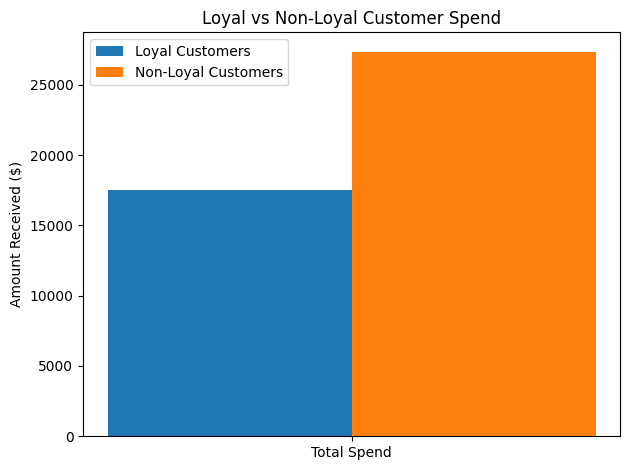

In [42]:

labels = ['Total Spend']
loyal_values = [
    overall_total_loyal_spend,
]
non_loyal_values = [
    overall_total_non_loyal_spend,
]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, loyal_values, width)
plt.bar(x + width/2, non_loyal_values, width)

plt.xticks(x, labels)
plt.ylabel('Amount Received ($)')
plt.title('Loyal vs Non-Loyal Customer Spend')
plt.legend(['Loyal Customers', 'Non-Loyal Customers'])

plt.tight_layout()
plt.show()


In [43]:
print(avg_non_loyal_spend)

9.143980614973263


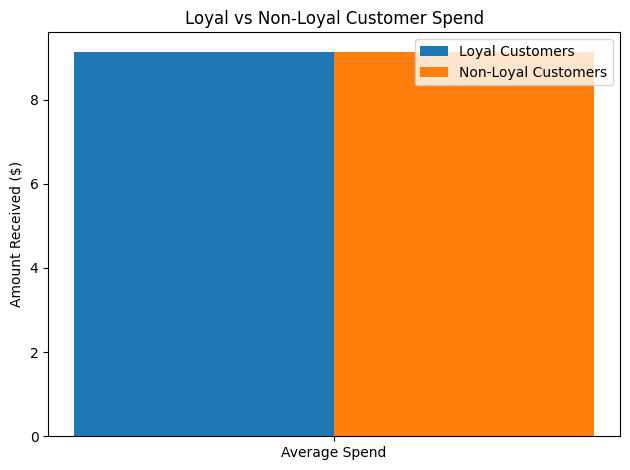

In [44]:

labels = ['Average Spend']
loyal_values = [
    avg_loyal_customer_spend.mean(),
]
non_loyal_values = [
    avg_non_loyal_spend,
]

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, loyal_values, width)
plt.bar(x + width/2, non_loyal_values, width)

plt.xticks(x, labels)
plt.ylabel('Amount Received ($)')
plt.title('Loyal vs Non-Loyal Customer Spend')
plt.legend(['Loyal Customers', 'Non-Loyal Customers'])

plt.tight_layout()
plt.show()


In [45]:
loyal_visits = pos_merged_with_members.shape[0]
non_loyal_visits = new_data_frame.shape[0]
print("Customer Visit Summary\n")

print("Loyal Customers")
print(f"• Total Visits: {loyal_visits:,}")

print("\nNon-Loyal Customers")
print(f"• Total Visits: {non_loyal_visits:,}")

print("\nInsight")
if loyal_visits > non_loyal_visits:
    print("• Loyal customers visit more frequently than non-loyal customers.")
else:
    print("• Non-loyal customers visit more frequently than loyal customers.")


Customer Visit Summary

Loyal Customers
• Total Visits: 633

Non-Loyal Customers
• Total Visits: 2,992

Insight
• Non-loyal customers visit more frequently than loyal customers.


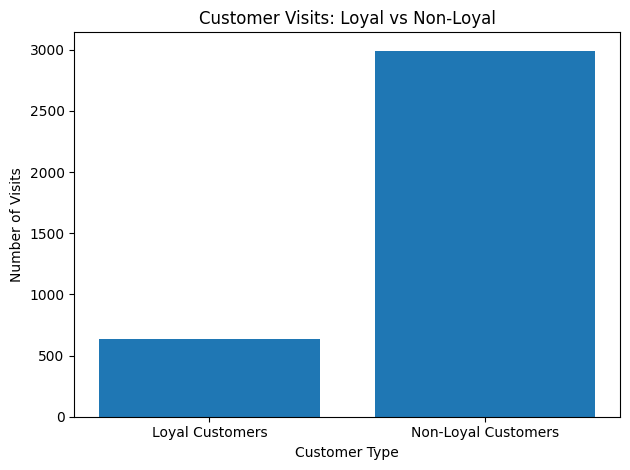

In [46]:
labels = ['Loyal Customers', 'Non-Loyal Customers']
visits = [loyal_visits, non_loyal_visits]

plt.figure()
plt.bar(labels, visits)
plt.title("Customer Visits: Loyal vs Non-Loyal")
plt.xlabel("Customer Type")
plt.ylabel("Number of Visits")
plt.tight_layout()
plt.show()


In [47]:
channel_preference_loyal_customers = pos_merged_with_members.groupby('order_channel').size()
channel_preference_non_loyal_customers = new_data_frame.groupby('order_channel').size()

print("Ordering Channel Preference Summary\n")

# Loyal customers
print("Loyal Customers: Channel Usage")
for channel, count in channel_preference_loyal_customers.items():
    print(f"• {channel}: {count} orders")

print("\n")

# Non-loyal customers
print("Non-Loyal Customers: Channel Usage")
for channel, count in channel_preference_non_loyal_customers.items():
    print(f"• {channel}: {count} orders")


Ordering Channel Preference Summary

Loyal Customers: Channel Usage
• Click-and-Collect: 307 orders
• In-Store: 326 orders


Non-Loyal Customers: Channel Usage
• Click-and-Collect: 1417 orders
• In-Store: 1575 orders


In [48]:
pos_merged_with_members['customer_type'] = 'Loyal'
new_data_frame['customer_type'] = 'Non-Loyal'

combined_df = pandas.concat([
    pos_merged_with_members[['order_channel', 'customer_type']],
    new_data_frame[['order_channel', 'customer_type']]
])


In [49]:
channel_crosstab = pandas.crosstab(
    combined_df['customer_type'],
    combined_df['order_channel'],
    margins=True
)


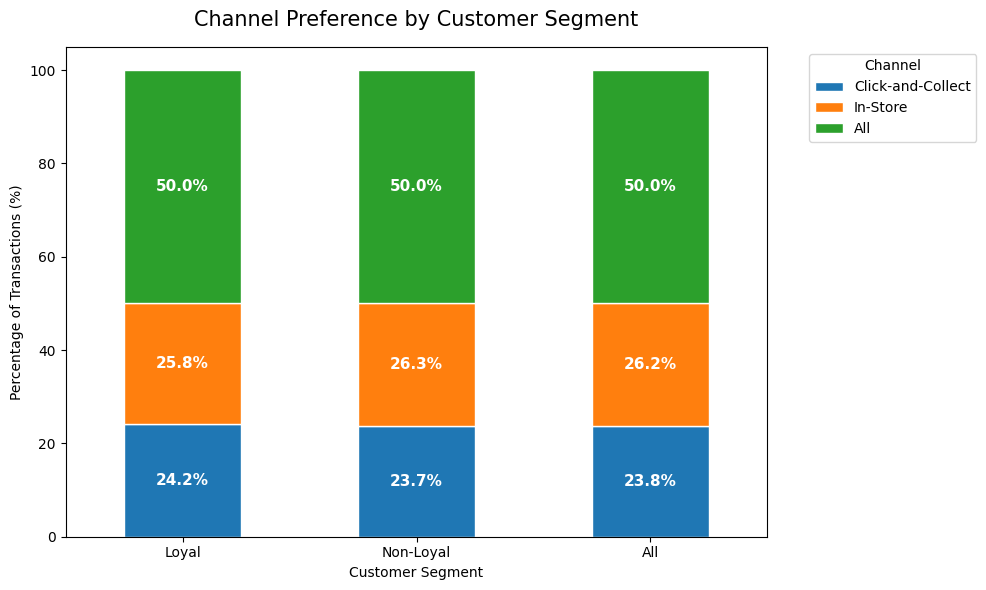

In [50]:
channel_crosstab_pct = channel_crosstab.div(channel_crosstab.sum(axis=1), axis=0) * 100

ax = channel_crosstab_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    edgecolor='white'
)

plt.title("Channel Preference by Customer Segment", fontsize=15, pad=15)
plt.ylabel("Percentage of Transactions (%)")
plt.xlabel("Customer Segment")
plt.xticks(rotation=0)
plt.legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

# For the percentage labels 
for i, customer_type in enumerate(channel_crosstab_pct.index):
    cumulative = 0
    for value in channel_crosstab_pct.loc[customer_type]:
        if value > 0:
            plt.text(
                i,
                cumulative + value / 2,
                f"{value:.1f}%",
                ha="center",
                va="center",
                fontsize=11,
                fontweight="bold",
                color="white"
            )
            cumulative += value

plt.tight_layout()
plt.show()


In [51]:
# Which products and stores are most profitable, and which need attention? Actutal Profits based on unit_price and line_discount
revenue_store = pos_transactions_line_merged.groupby('store_id')[
    'unit_price'].sum()
discount_store = pos_transactions_line_merged.groupby('store_id')[
    'line_discount'].sum()
profit_store = pos_transactions_line_merged.groupby('store_id')['amount_received'].sum()
revenue_product = pos_transactions_line_merged.groupby('product_id')[
    'unit_price'].sum()
discount_product = pos_transactions_line_merged.groupby('product_id')['line_discount'].sum()
profit_product = pos_transactions_line_merged.groupby('product_id')['amount_received'].sum()

In [52]:
# Store-level profitability 
print("Store Profitability Summary")

print("\n Top 5 Most Profitable Stores ($):")
print(profit_store.sort_values(ascending=False).head(5).to_string())

print("\n Bottom 5 Least Profitable Stores (Need Attention):")
print(profit_store.sort_values(ascending=True).head(5).to_string())


Store Profitability Summary

 Top 5 Most Profitable Stores ($):
store_id
1    6079.30
2    5811.53
4    5484.78
5    5002.76
3    4980.42

 Bottom 5 Least Profitable Stores (Need Attention):
store_id
3    4980.42
5    5002.76
4    5484.78
2    5811.53
1    6079.30


In [53]:
# Product-level profitability 
print("\n Product Profitability Summary")

print("\n Top 10 Most Profitable Products ($):")
print(profit_product.sort_values(ascending=False).head(3).to_string())

print("\n Bottom 10 Least Profitable Products (Need Attention):")
print(profit_product.sort_values(ascending=True).head(3).to_string())


 Product Profitability Summary

 Top 10 Most Profitable Products ($):
product_id
433    165.66
394    162.81
738    159.91

 Bottom 10 Least Profitable Products (Need Attention):
product_id
14     1.51
287    1.60
571    1.63


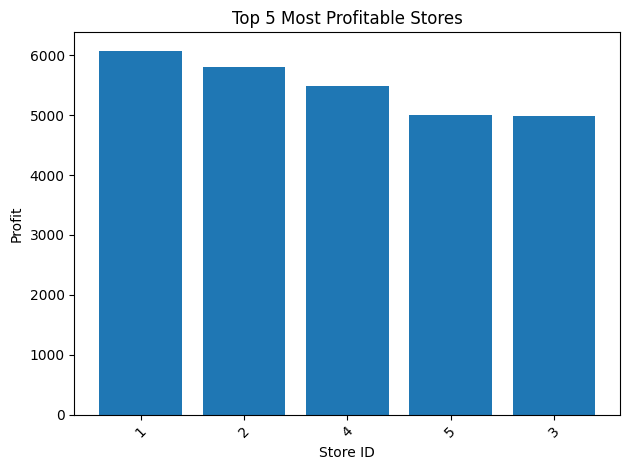

In [54]:
top_5_stores = profit_store.sort_values(ascending=False)

plt.figure()
plt.bar(top_5_stores.index.astype(str), top_5_stores.values)
plt.title("Top 5 Most Profitable Stores")
plt.xlabel("Store ID")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


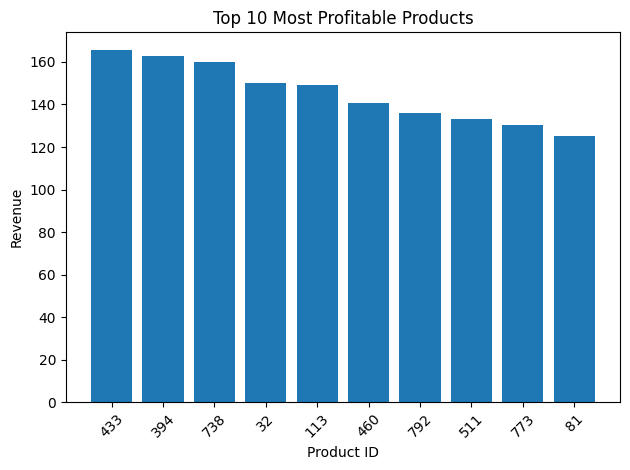

In [64]:
top_10_products = profit_product.sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top_10_products.index.astype(str), top_10_products.values)
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Product ID")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


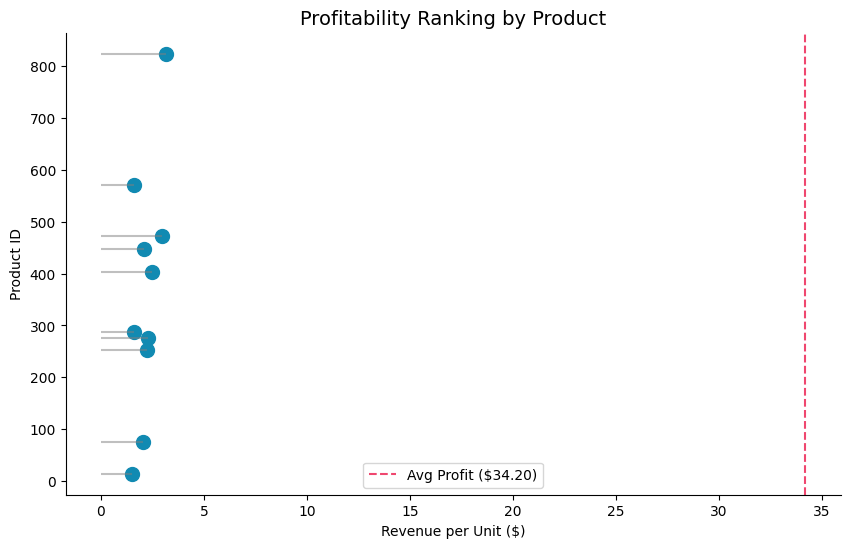

In [65]:
# Calculate the average profit across all categories
mean_profit = profit_product.mean()

plt.figure(figsize=(10, 6))
# Sort for aesthetic appeal
sorted_profit = profit_product.sort_values().head(10)

plt.hlines(y=sorted_profit.index, xmin=0, xmax=sorted_profit.values, color='grey', alpha=0.5)
plt.scatter(y=sorted_profit.index, x=sorted_profit.values, color='#118ab2', s=100)

# Add the "Attention" line
plt.axvline(x=mean_profit, color='#ef476f', linestyle='--', label=f'Avg Profit (${mean_profit:.2f})')

plt.title("Profitability Ranking by Product", fontsize=14)
plt.xlabel("Revenue per Unit ($)")
plt.ylabel("Product ID")
plt.legend()
sns.despine()
plt.show()

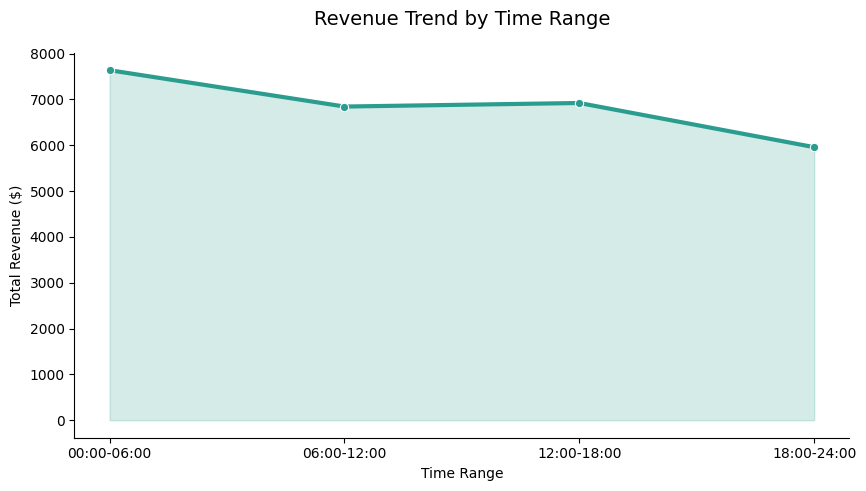

In [57]:
plt.figure(figsize=(10, 5))
# Converting categorical month to numeric for a smooth line
sns.lineplot(x=pos_sales_time.index, y=pos_sales_time.values, marker='o', color='#2a9d8f', linewidth=3)
plt.fill_between(pos_sales_time.index, pos_sales_time.values, color='#2a9d8f', alpha=0.2)

plt.title("Revenue Trend by Time Range", fontsize=14, pad=20)
plt.ylabel("Total Revenue ($)")
plt.xlabel("Time Range")
sns.despine()
plt.show()

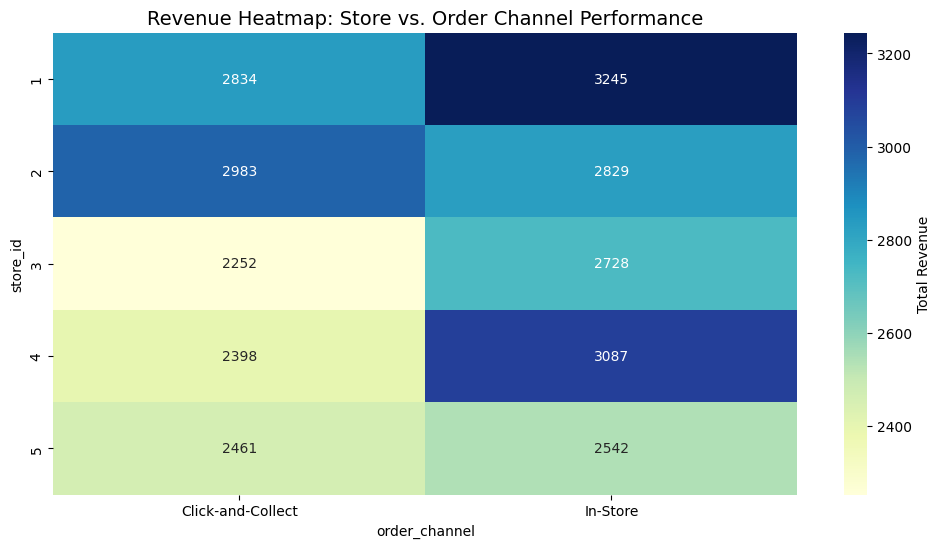

In [58]:
store_category_profit = pos_transactions_line_merged.pivot_table(
    index='store_id', 
    columns='order_channel', 
    values='amount_received', 
    aggfunc='sum'
)

plt.figure(figsize=(12, 6))
sns.heatmap(store_category_profit, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Revenue'})

plt.title("Revenue Heatmap: Store vs. Order Channel Performance", fontsize=14)
plt.show()

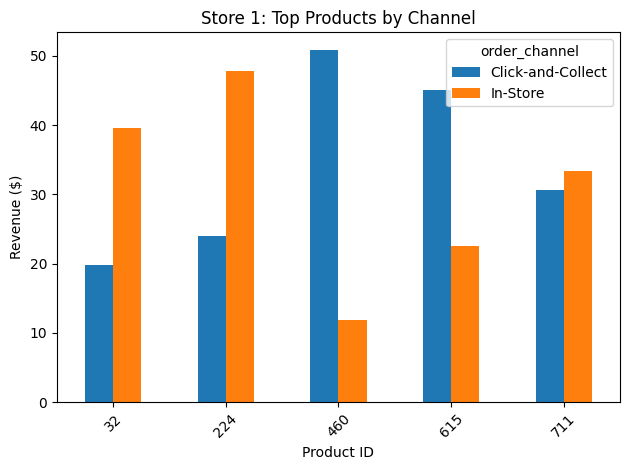

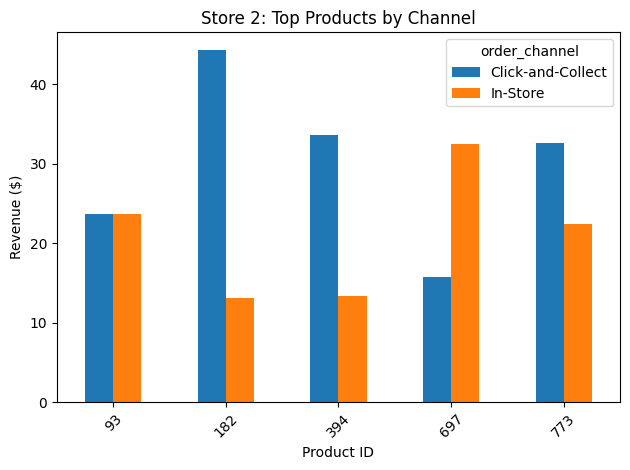

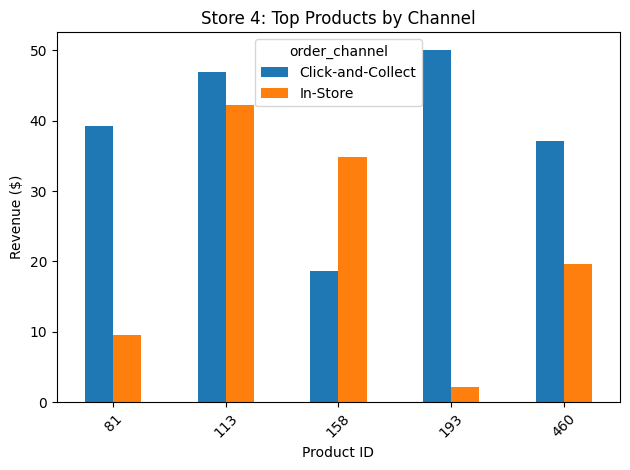

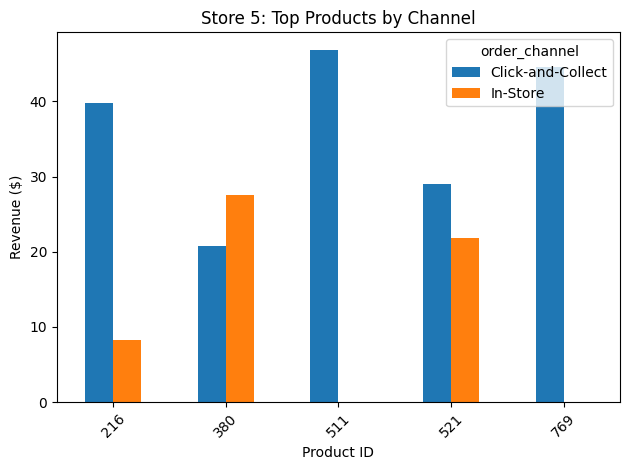

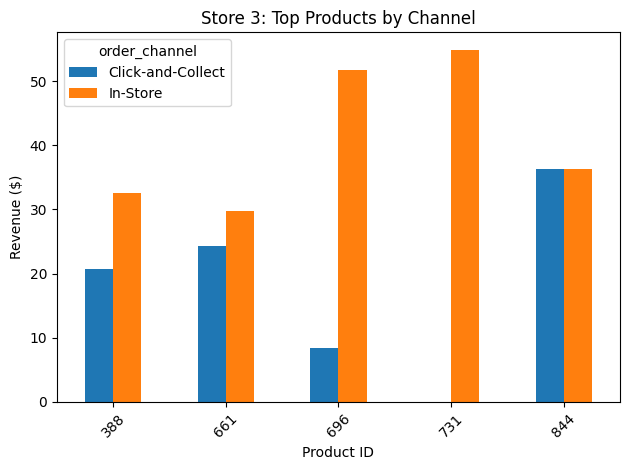

In [60]:
# Aggregate revenue by store, product, and channel
store_product_channel_revenue = (
    pos_transactions_line_merged
    .groupby(['store_id', 'product_id', 'order_channel'])['amount_received']
    .sum()
    .reset_index()
)

# Select top 5 stores by total revenue
top_5_stores = (
    store_product_channel_revenue
    .groupby('store_id')['amount_received']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

for store in top_5_stores:
    store_data = store_product_channel_revenue[
        store_product_channel_revenue['store_id'] == store
    ]

    # Top 5 products in this store
    top_products = (
        store_data.groupby('product_id')['amount_received']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    plot_data = store_data[store_data['product_id'].isin(top_products)]

    pivot = plot_data.pivot(
        index='product_id',
        columns='order_channel',
        values='amount_received'
    ).fillna(0)

    pivot.plot(kind='bar')
    plt.title(f"Store {store}: Top Products by Channel")
    plt.xlabel("Product ID")
    plt.ylabel("Revenue ($)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [67]:
product_time = (
    pos_transactions_line_merged
        .groupby(["product_id", "time_range"])
        .agg(
            total_revenue=("amount_received", "sum"),
            transaction_count=("store_id", "count")
        )
        .reset_index()
)

product_time.head()


C:\Users\kumbi\AppData\Local\Temp\ipykernel_18704\2321087693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["product_id", "time_range"])


,product_id,time_range,total_revenue,transaction_count
0,5,00:00-06:00,12.98,1
1,5,06:00-12:00,0.00,0
2,5,12:00-18:00,12.98,1
3,5,18:00-24:00,0.00,0
4,6,00:00-06:00,4.10,1


C:\Users\kumbi\AppData\Local\Temp\ipykernel_18704\2370981011.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["time_range","product_id"])["amount_received"]


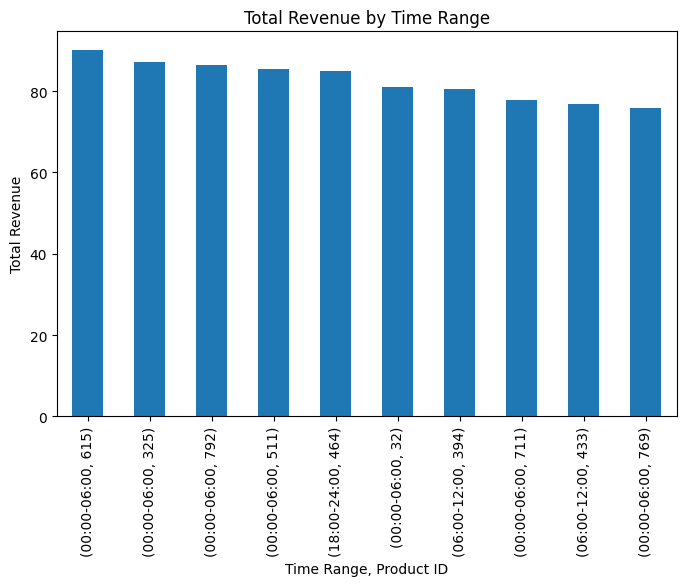

In [83]:
plot_data = (
    pos_transactions_line_merged
        .groupby(["time_range","product_id"])["amount_received"]
        .sum()
        .sort_index()
        .sort_values(ascending=False)
        .head(10)
)

plot_data.plot(kind="bar", figsize=(8,5))
plt.ylabel("Total Revenue")
plt.xlabel("Time Range, Product ID")
plt.title("Total Revenue by Time Range")
plt.show()
